In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the data from the provided Excel file
sales_data = pd.read_excel('/Users/lisareedpreston/Desktop/IPYNB/1688639662_ausapparalsales4thqrt2020.xlsx')

# Display the first few rows of the dataset
sales_data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [3]:
# Check for missing data in the dataset
missing_data = sales_data.isna().sum()

# Display the count of missing values for each column
missing_data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
# Basic statistics for the "Unit" and "Sales" columns
sales_data[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [5]:
# Descriptive statistical analysis for the "Sales" and "Unit" columns grouped by "Group"
group_stats = sales_data.groupby('Group')[['Unit', 'Sales']].describe()

# Determine the group with the highest and lowest sales
max_sales_group = sales_data.groupby('Group')['Sales'].sum().idxmax()
min_sales_group = sales_data.groupby('Group')['Sales'].sum().idxmin()

# Determine the state with the highest and lowest sales
max_sales_state = sales_data.groupby('State')['Sales'].sum().idxmax()
min_sales_state = sales_data.groupby('State')['Sales'].sum().idxmin()

group_stats, max_sales_group, min_sales_group, max_sales_state, min_sales_state


(            Unit                                                     Sales  \
            count       mean        std  min  25%   50%   75%   max   count   
 Group                                                                        
  Kids     1890.0  18.004762  12.748596  2.0  8.0  14.0  26.0  65.0  1890.0   
  Men      1890.0  18.148148  12.870872  2.0  8.0  14.0  26.0  64.0  1890.0   
  Seniors  1890.0  17.785714  12.878144  2.0  8.0  14.0  25.0  65.0  1890.0   
  Women    1890.0  18.083069  13.112656  2.0  8.0  14.0  27.0  65.0  1890.0   
 
                                                                          \
                   mean           std     min      25%      50%      75%   
 Group                                                                     
  Kids     45011.904762  31871.491085  5000.0  20000.0  35000.0  65000.0   
  Men      45370.370370  32177.180712  5000.0  20000.0  35000.0  65000.0   
  Seniors  44464.285714  32195.360017  5000.0  20000.0  35000.0  

In [6]:
# Extracting month, week, and quarter from the Date column for further analysis
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Quarter'] = sales_data['Date'].dt.quarter

# Weekly report
weekly_report = sales_data.groupby(['Week', 'Group'])['Sales'].sum().unstack()

# Monthly report
monthly_report = sales_data.groupby(['Month', 'Group'])['Sales'].sum().unstack()

# Quarterly report
quarterly_report = sales_data.groupby(['Quarter', 'Group'])['Sales'].sum().unstack()

weekly_report, monthly_report, quarterly_report


(Group     Kids      Men   Seniors    Women
 Week                                      
 40     3690000  3730000   3782500  3842500
 41     7020000  6807500   6737500  6437500
 42     6707500  6710000   6470000  6752500
 43     6525000  6872500   6757500  6660000
 44     5490000  5507500   5540000  5270000
 45     5125000  5335000   4962500  5442500
 46     5315000  5242500   5397500  5217500
 47     5302500  5025000   5200000  5585000
 48     5577500  5482500   5302500  5115000
 49     7362500  7505000   7217500  7537500
 50     8030000  7802500   7805000  7887500
 51     7765000  7990000   7772500  8127500
 52     7630000  8337500   7685000  8117500
 53     3532500  3402500   3407500  3450000,
 Group      Kids       Men   Seniors     Women
 Month                                        
 10     28635000  28885000  28565000  28205000
 11     22882500  22615000  22322500  22862500
 12     33555000  34250000  33150000  34375000,
 Group        Kids       Men   Seniors     Women
 Quarter  

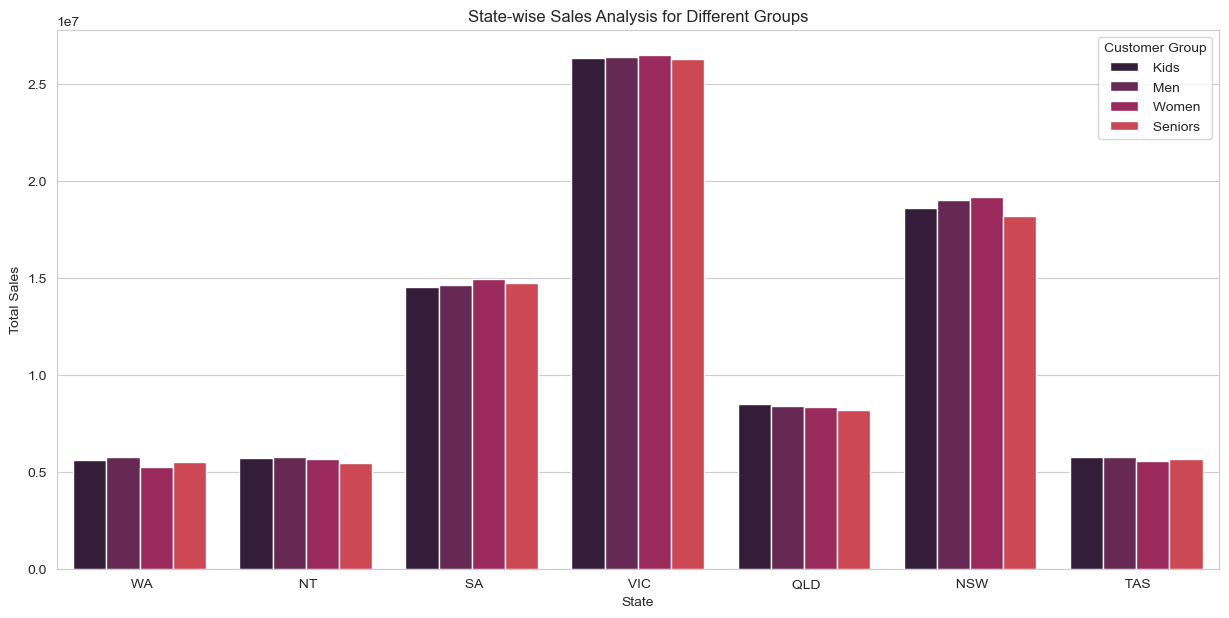

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for Seaborn plots
sns.set_style("whitegrid")

# Setting the rocket color palette for the plot
palette = sns.color_palette("rocket")

# State-wise sales analysis for different groups
plt.figure(figsize=(15, 7))
sns.barplot(data=sales_data, x="State", y="Sales", hue="Group", estimator=sum, errorbar=None, palette=palette)
plt.title("State-wise Sales Analysis for Different Groups")
plt.ylabel("Total Sales")
plt.xlabel("State")
plt.legend(title="Customer Group")
plt.show()


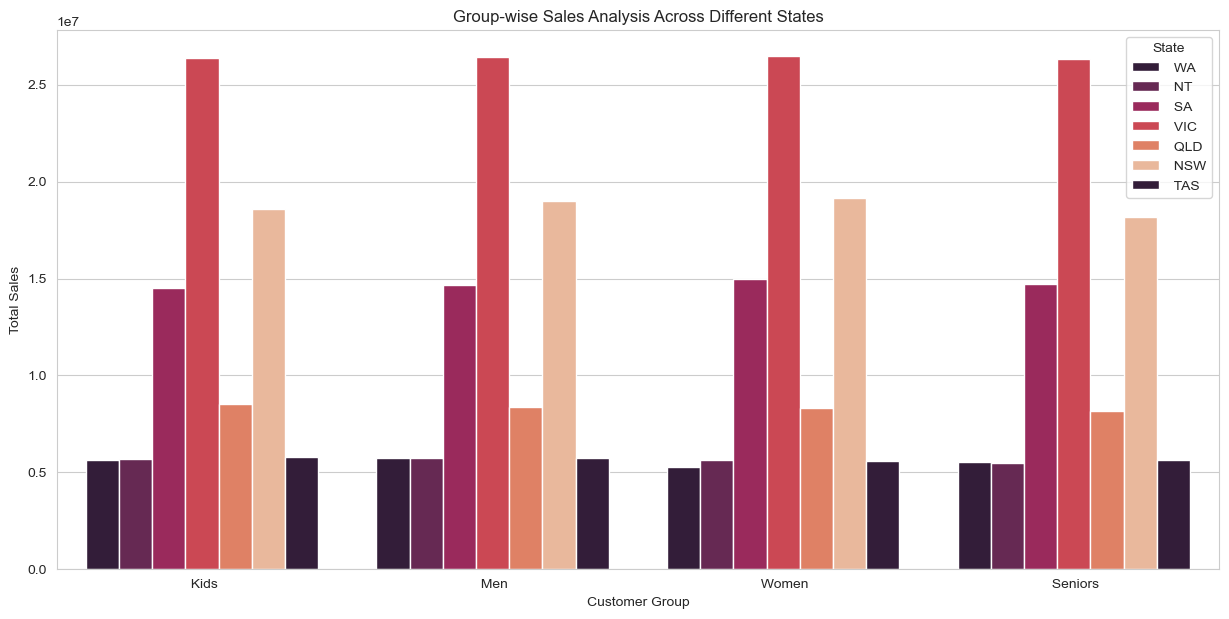

In [20]:
# Group-wise sales analysis across different states
plt.figure(figsize=(15, 7))
sns.barplot(data=sales_data, x="Group", y="Sales", hue="State", estimator=sum, errorbar=None, palette=palette)
plt.title("Group-wise Sales Analysis Across Different States")
plt.ylabel("Total Sales")
plt.xlabel("Customer Group")
plt.legend(title="State")
plt.show()


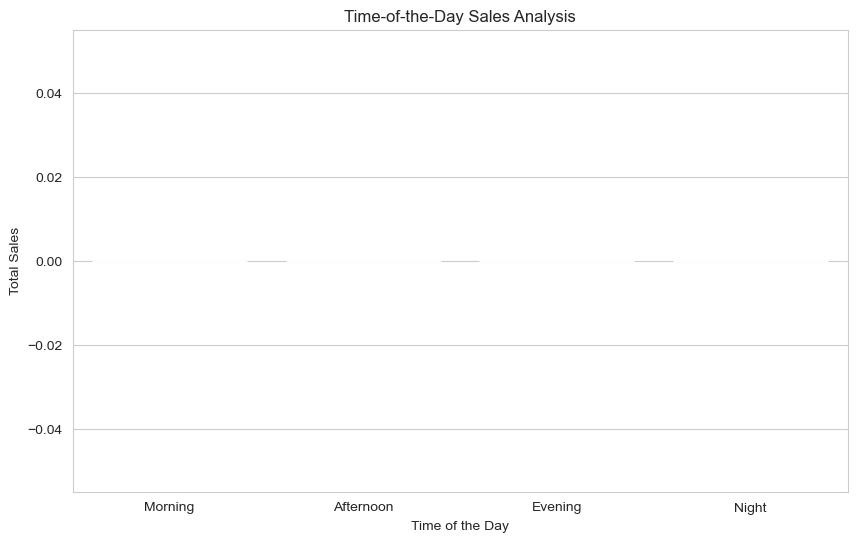

In [33]:
# Time-of-the-day analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x="Time", y="Sales", estimator=sum, errorbar=None,  color=palette[0], order=["Morning", "Afternoon", "Evening", "Night"])
plt.title("Time-of-the-Day Sales Analysis")
plt.ylabel("Total Sales")
plt.xlabel("Time of the Day")
plt.show()


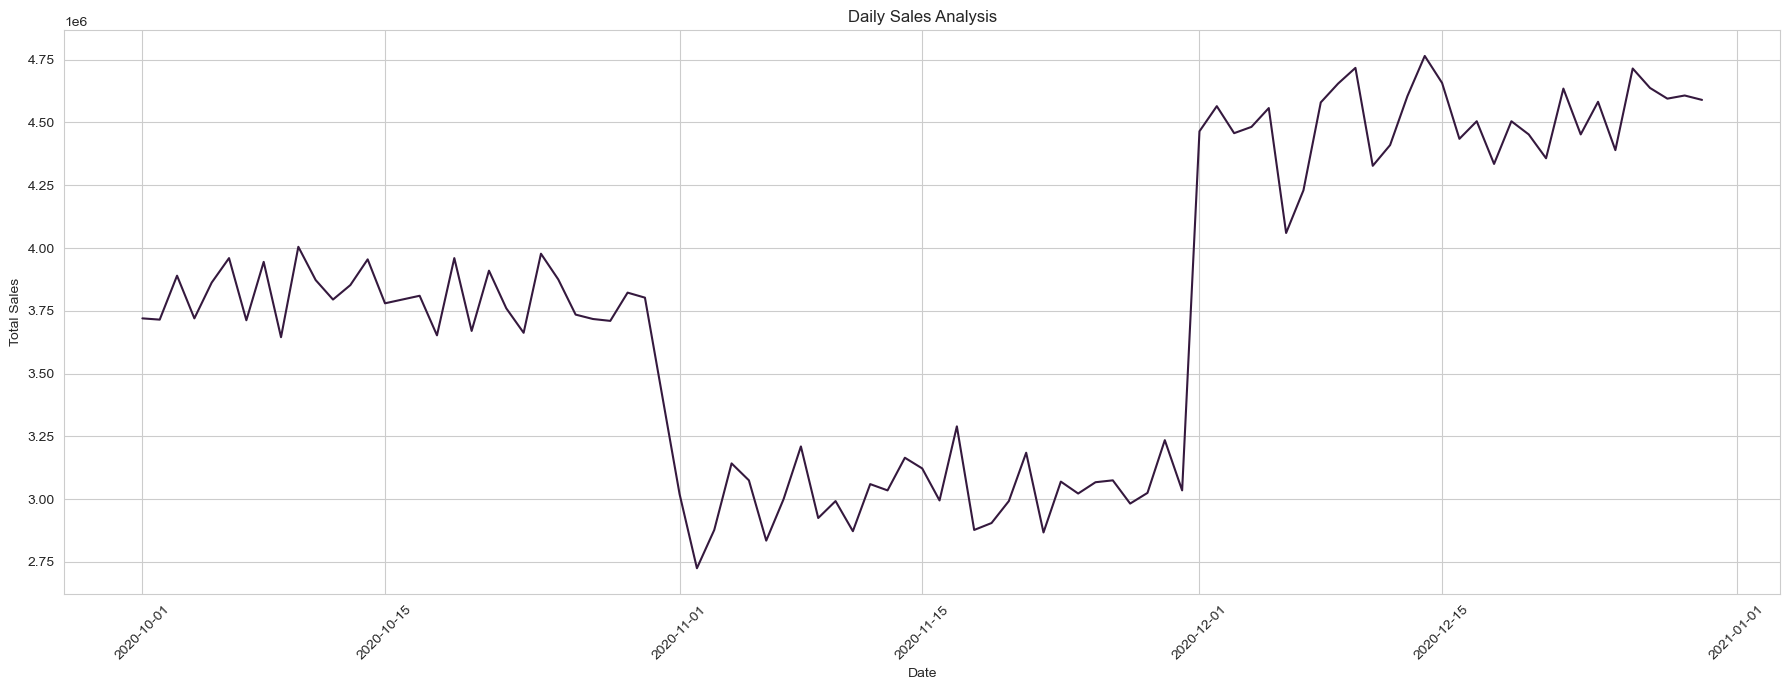

In [31]:
# Daily sales analysis
plt.figure(figsize=(18, 7))
sns.lineplot(data=sales_data, x="Date", y="Sales", estimator=sum, errorbar=None, color=palette[0])
plt.title("Daily Sales Analysis")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


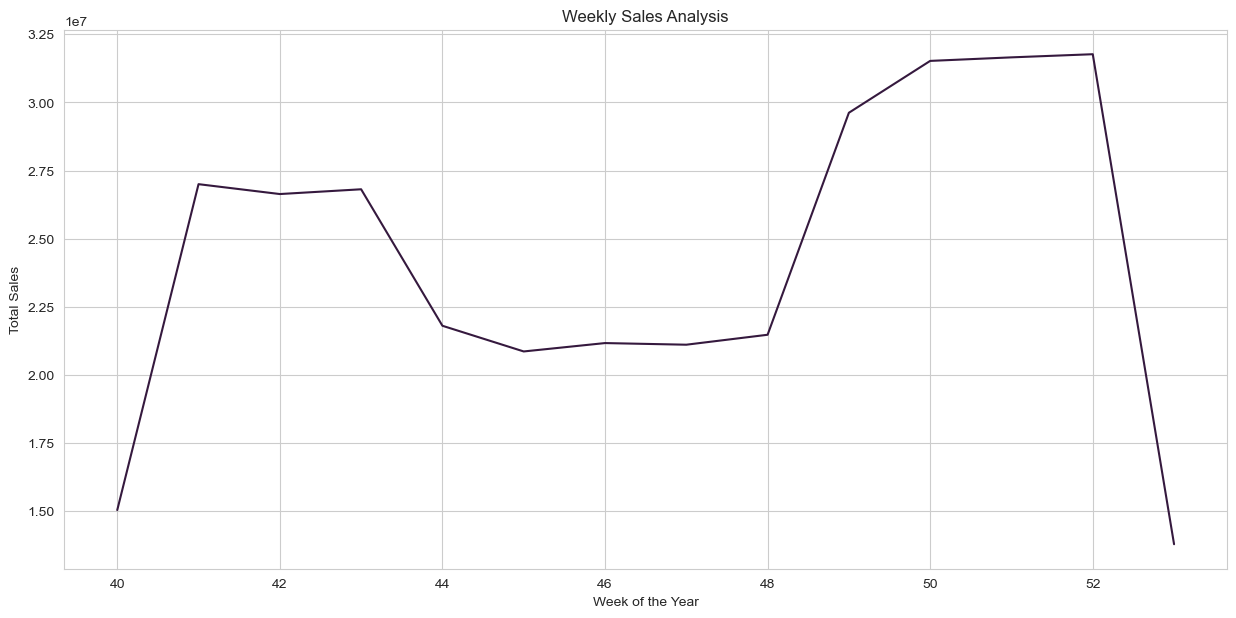

In [32]:
# Weekly sales analysis
plt.figure(figsize=(15, 7))
sns.lineplot(data=sales_data, x="Week", y="Sales", estimator=sum, errorbar=None, color=palette[0])
plt.title("Weekly Sales Analysis")
plt.ylabel("Total Sales")
plt.xlabel("Week of the Year")
plt.show()


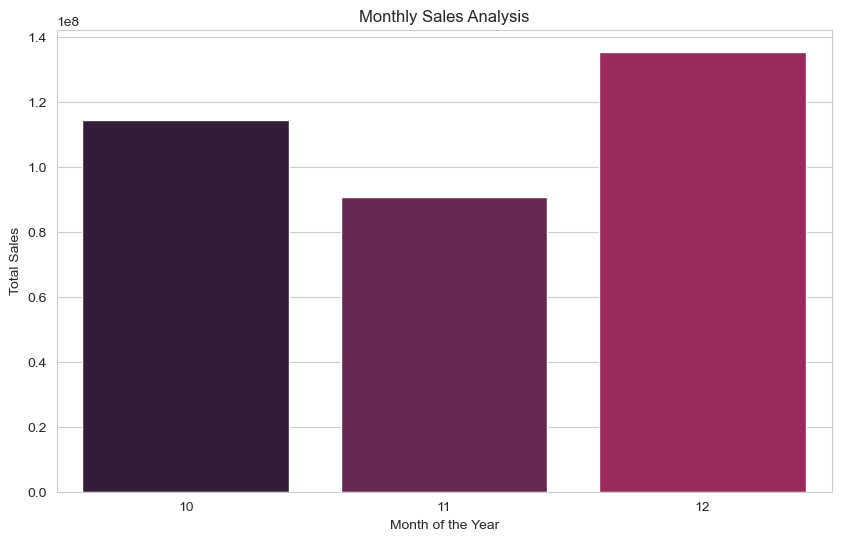

In [26]:
# Monthly sales analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x="Month", y="Sales", estimator=sum, errorbar=None, palette=palette)
plt.title("Monthly Sales Analysis")
plt.ylabel("Total Sales")
plt.xlabel("Month of the Year")
plt.show()


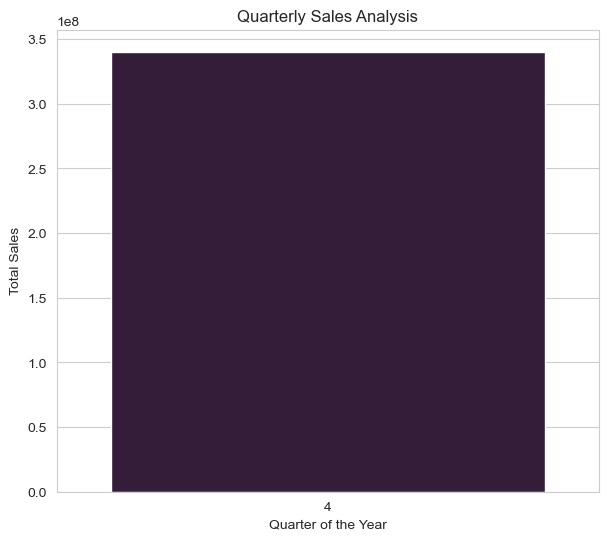

In [27]:
# Quarterly sales analysis
plt.figure(figsize=(7, 6))
sns.barplot(data=sales_data, x="Quarter", y="Sales", estimator=sum, errorbar=None, palette=palette)
plt.title("Quarterly Sales Analysis")
plt.ylabel("Total Sales")
plt.xlabel("Quarter of the Year")
plt.show()


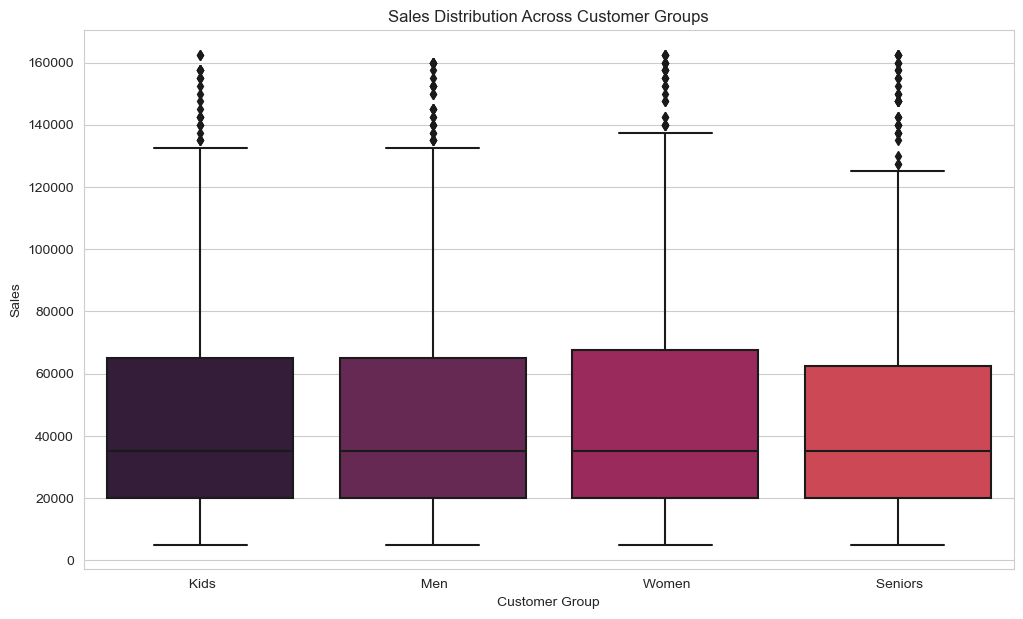

In [28]:
# Box plot for descriptive statistics across different customer groups
plt.figure(figsize=(12, 7))
sns.boxplot(data=sales_data, x="Group", y="Sales", palette=palette)
plt.title("Sales Distribution Across Customer Groups")
plt.ylabel("Sales")
plt.xlabel("Customer Group")
plt.show()


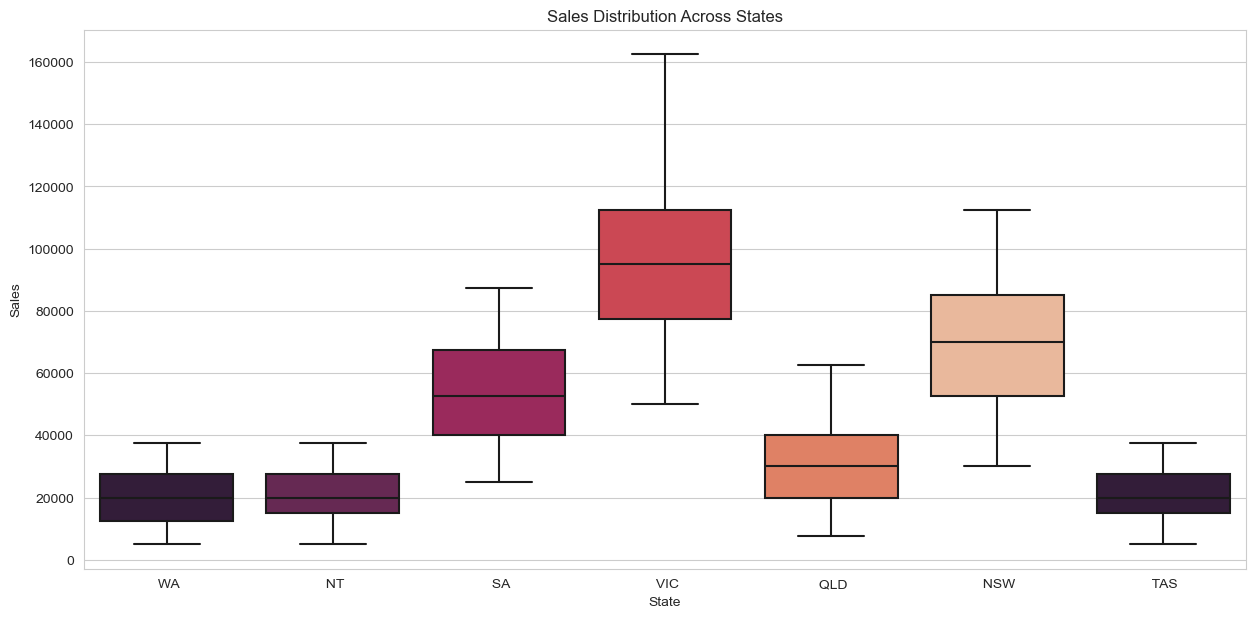

In [34]:
# Box plot for descriptive statistics across different states
plt.figure(figsize=(15, 7))
sns.boxplot(data=sales_data, x="State", y="Sales", palette=palette)
plt.title("Sales Distribution Across States")
plt.ylabel("Sales")
plt.xlabel("State")
plt.show()


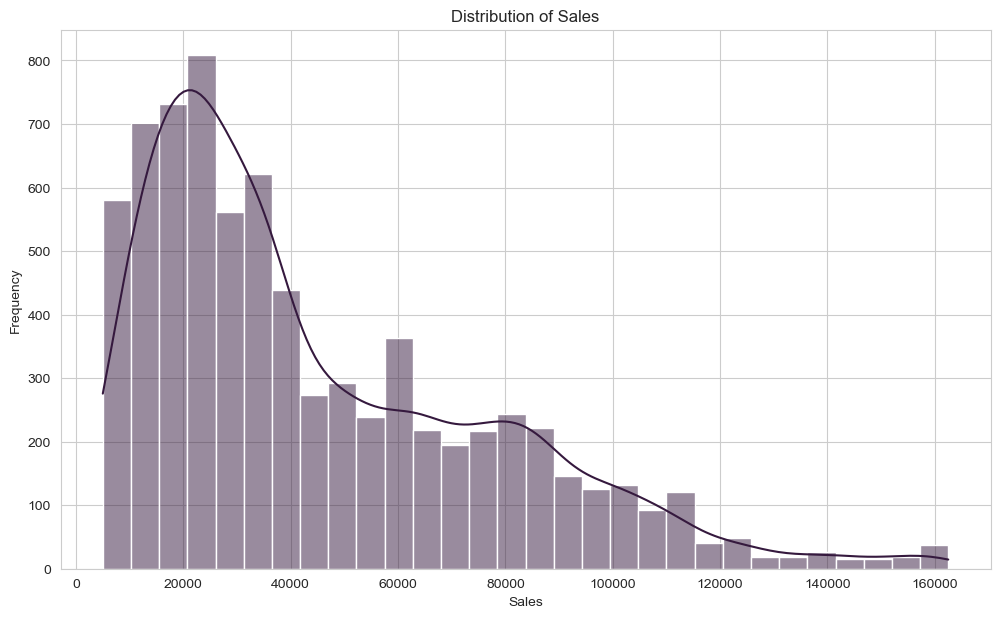

In [35]:
# Seaborn distribution plot for sales
plt.figure(figsize=(12, 7))
sns.histplot(sales_data['Sales'], kde=True, bins=30, color=palette[0])
plt.title("Distribution of Sales")
plt.ylabel("Frequency")
plt.xlabel("Sales")
plt.show()
